In [6]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from gfos.data.utils import load_layout
from gfos.utils.plottling import plot_univar_dist

warnings.filterwarnings('ignore')

In [4]:
LAYOUT_DIR = r"H:\data\gfos\predict-ai-model-runtime\npz_all\npz\layout"


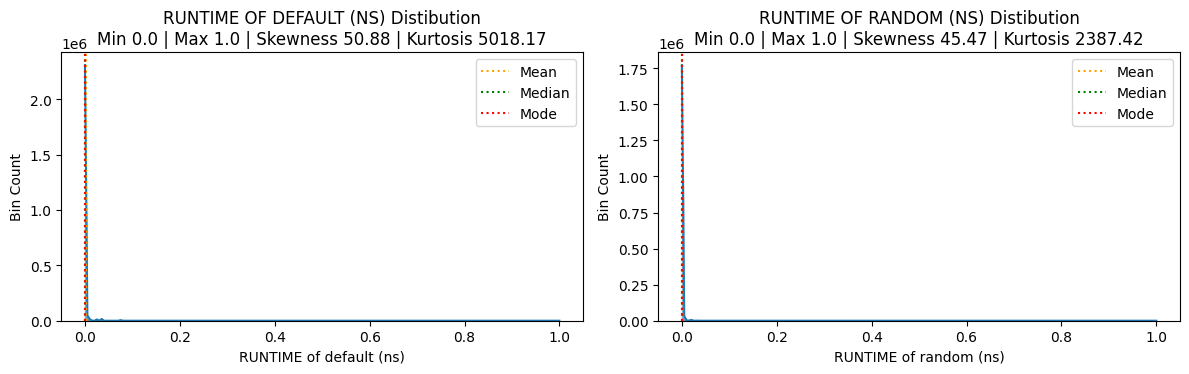

In [30]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, search in enumerate(("default", "random")):
    layout_files = load_layout(LAYOUT_DIR, compile_type=search, model_type="xla")

    all_runtime = []

    for file in layout_files["train"]:
        npz = np.load(file)
        runtime = npz["config_runtime"]
        all_runtime.append(runtime) 

    all_runtime = np.concatenate(all_runtime, axis=0)
    all_runtime = (all_runtime- all_runtime.mean()) / all_runtime.std()
    # all_runtime = (all_runtime- all_runtime.min()) / (all_runtime.max() - all_runtime.min())
    plot_univar_dist(
        all_runtime,
        f"RUNTIME of {search} (ns)",
        ax=axes[i]
    )

plt.tight_layout()

In [31]:
np.sort(all_runtime)[:10]

array([0.00000000e+00, 1.88329173e-09, 3.57661883e-09, 3.92132287e-09,
       4.91769364e-09, 6.17447951e-09, 6.44244286e-09, 6.78588885e-09,
       7.12933483e-09, 7.19978529e-09])